<a href="https://colab.research.google.com/github/ReginaDelcourt/PosDataScience/blob/main/MVP__Sprint_I__Regina_Delcourt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint I - Análise de Dados e Boas Práticas

## Regina Delcourt

### Análise de Dados Para um Problema de Classificação


## Estrutura
O notebook está dividido da seguinte maneira:

1. Definição do Problema
  
  1.1. Importação dos pacotes

2. Carga de Dados
  
  2.1. Carregamento do dataset

3. Análise de Dados
  
  3.1. Estatísticas Descritivas
    
  3.2. Visualizações Unimodais
   
  3.3. Visualizações Multimodais
    
4. Pré-Processamento de Dados
  
  4.1. Tratamento de Missings e Limpeza

  4.2. Tratamento de dados categóricos

  4.3. Separação em conjunto de treino e conjunto de teste
   
  4.4. Normalização

  4.5. Padronização

5. Conclusão

####Créditos
O notebook foi adaptado do material de aula e documentado por: Regina Delcourt

## 1. Definição do Problema

**Objetivo:** O objetivo do presente trabalho é realizar a análise e o pré-processamento de dados de um dataset, de forma a prepará-lo para, por meio de modelos de machine learning, ser possível prever se terá chuva no dia seguinte ou não, com base em dados meteorológicos do dia atual.

**Descrição do problema:** Analisar e pré-processar dados, para um modelo de aprendizagem de máquina de previsão da ocorrência de chuvas, é crucial para permitir um planejamento mais eficiente e sustentável em diversas áreas da sociedade, como por exemplo, agricultura, gestão de recursos hídricos, prevenção de desastres naturais, energia, planejamento urbano, transporte e saúde pública, reduzindo riscos, melhorando a resiliência e otimizando o uso de recursos. Por isso a importância contínua do desenvolvimento e aprimoramento de tecnologias de previsão meteorológica.

**Premissas do problema:** O problema apresentado no presente trabalho é um problema de aprendizado supervisionado, onde o algoritmo será treinado em um conjunto de dados rotulado, sendo que cada exemplo de entrada está associado a uma saída desejada (se ocorrerá chuva ou não no dia seguinte).

**Condições / Sobre o Dataset:** O conjunto de dados utilizados no presente trabalho, contém aproximadamente 10 anos de observações meteorológicas diárias de diferentes localidades da Austrália, extraídas de inúmeras estações meteorológicas.

O dataset foi obtido no repositório Kaggle (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data).

A base de dados é composta por 22 atributos, sendo a maioria variáveis numéricas relacionadas à dados meteorológicos, mais um atributo de classe, que prevê a ocorrência de chuva no dia seguinte ou não.

**Definição dos atributos:**

1. **Date** - Data da observação
2. **Location** - Nome da localização da estação meteorológica
3. **MinTemp** - Temperatura mínima em graus celsius
4. **MaxTemp** - Temperatura máxima em graus celsius
5. **Rainfall** - Quantidade de chuva registrada no dia em mm
6. **Evaporation** - Evaporação do tanque Classe A (mm) nas 24 horas às 9h
7. **Sunshine** - Número de horas de sol brilhante no dia
8. **WindGustDir** - Direção da rajada de vento mais forte nas 24 horas até meia-noite
9. **WindGustSpeed** - Velocidade (km/h) da rajada de vento mais forte nas 24 horas até à meia-noite
10. **WindDir9am** - Direção do vento às 9h
11. **WindDir3pm** - Direção do vento às 15h
12. **WindSpeed9am** - Velocidade média do vento (km/h) de 10 minutos antes das 9h
13. **WindSpeed3pm** - Velocidade média do vento (km/h) de 10 minutos antes das 15h
14. **Humidity9am** - Umidade (porcentagem) às 9h
15. **Humidity3pm** - Umidade (porcentagem) às 15h
16. **Pressure9am** - Pressão atmosférica (hpa) reduzida ao nível médio do mar às 9h
17. **Pressure3pm** - Pressão atmosférica (hpa) reduzida ao nível médio do mar às 15h
18. **Cloud9am** - Fração do céu obscurecido por nuvens às 9h
(Isto é medido em "oktas", que é uma unidade de oitos. Ele registra quantos oitavos do céu estão obscurecidos por nuvens. Uma medida 0 indica céu completamente limpo, enquanto um 8 indica que está completamente nublado).
19. **Cloud3pm** - Fração de céu obscurecido por nuvem (em "oktas": oitavos) às 15h.
20. **Temp9am** - Temperatura (graus C) às 9h
21. **Temp3pm** - Temperatura (graus C) às 15h
22. **RainToday** - Sim se a precipitação (mm) nas 24 horas até às 9h exceder 1mm, caso contrário Não
23. **RainTomorrow** - Variável alvo a ser prevista. Choverá no dia seguinte, sim ou não? Esta coluna será Sim se a chuva naquele dia for de 1mm ou mais.


















###1.1 - Importação dos pacotes utilizados neste notebook e configuração para que os warnings não sejam exibidos

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings

from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
## Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy enco

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

###2.1 - Carregamento do dataset a partir de um arquivo disponível no git-hub e exibição das primeiras linhas do dataset

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar um arquivo .csv disponível online.

Com o dataset carregado, iremos visualizar as primeiras linhas do mesmo.

In [2]:
# importando dados de uma url para um dataframe
# url a importar
url_dados = 'https://raw.githubusercontent.com/ReginaDelcourt/PosDataScience/main/weatherAUS.csv'

# carga do dataset através da url
rain = pd.read_csv(url_dados, delimiter=',')

In [3]:
rain.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Por meio da visualização das 5 primeiras linhas do dataset já é possível observar a ocorrência de valores faltantes, que serão tratados mais a frente.

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

####3.1.1. Informações e Dimensões do dataset
Primeiramente iremos examinar as informações e dimensões do dataset, assim como alguns exemplos de linhas no início e fim da base de dados.

In [4]:
# Mostra as informações do dataset
print(rain.info())

# Mostra as dimensões do dataset
print(rain.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Observa-se, então, que o dataset a ser estudado contem 145.460 instâncias e 23 atributos.
Pode-se verificar, ainda, que dos 23 atributos do dataset, 16 são dados numéricos e 7 são objetos. Essa informação é importante pois, possivelmente, será necessário algum tipo de tratamento nos atributos categóricos.


####3.1.2. Primeiras e últimas linhas do dataset

In [5]:
# Mostra as 10 primeiras linhas do dataset
rain.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [6]:
# Mostra as 10 últimas linhas do dataset
rain.tail(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145450  2017-06-16    Uluru      5.2     24.3       0.0          NaN   
145451  2017-06-17    Uluru      6.4     23.4       0.0          NaN   
145452  2017-06-18    Uluru      8.0     20.7       0.0          NaN   
145453  2017-06-19    Uluru      7.4     20.6       0.0          NaN   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145450       NaN           E           24.0         SE  ...        53.0   
145451       NaN         ESE           31.0          S  ...        53.0   
145452       NaN         ESE           41.0         SE  ...        56.0   
145453       NaN           E           35.0        ESE  ...        63.0   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145450         24.0       1023.8       1020.0       NaN       NaN     12.3   
145451         25.0       1025.8       1023.0       NaN       NaN     11.2   
145452         32.0       1028.1       1024.3       NaN       7.0     11.6   
145453         33.0       1027.2       1023.3       NaN       NaN     11.0   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145450     23.3         No            No  
145451     23.1         No            No  
145452     20.0         No            No  
145453     20.3         No            No  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[10 rows x 23 columns]

Conforme visto anteriormente com o comando info, é importante verificar o tipo dos atributos do dataset, pois pode ser necessário realizar conversões e tratamentos na etapa de pré-processamento dos dados.
Por meio das primeiras e últimas linhas do dataset observa-se valores faltantes, que serão tratados posteriormente.

A seguir é apresentada outra forma de verificar a natureza de cada atributo.

####3.1.3. Natureza de cada atributo

In [7]:
# Verifica o tipo de dataset de cada atributo
rain.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

####3.1.4. Resumo Estatístico

A seguir é apresentado um resumo estatístico dos atributos com valor numérico (contagem, média, desvio padrão, mínimo, quartis, máximo e valores ausentes).



In [8]:
# Faz um resumo estatístico do dataset (contagem, média, desvio padrão, mínimo,
#máximo, quartis e os valores ausentes)

resumo_estatistico = rain.describe()

# Número de valores ausentes
valores_ausentes = rain.isnull().sum()

# Adicionar o número de valores ausentes ao resumo
resumo_estatistico.loc['valores_ausentes'] = valores_ausentes

# Visualize o resumo estatístico
print(resumo_estatistico)

                        MinTemp        MaxTemp       Rainfall   Evaporation  \
count             143975.000000  144199.000000  142199.000000  82670.000000   
mean                  12.194034      23.221348       2.360918      5.468232   
std                    6.398495       7.119049       8.478060      4.193704   
min                   -8.500000      -4.800000       0.000000      0.000000   
25%                    7.600000      17.900000       0.000000      2.600000   
50%                   12.000000      22.600000       0.000000      4.800000   
75%                   16.900000      28.200000       0.800000      7.400000   
max                   33.900000      48.100000     371.000000    145.000000   
valores_ausentes    1485.000000    1261.000000    3261.000000  62790.000000   

                      Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count             75625.000000  135197.000000  143693.000000  142398.000000   
mean                  7.611178      40.035230      

Por meio da análise do resumo estatístico, podemos fazer algumas considerações.

O indicador de contagem (Count) indica o número de observações disponíveis para cada variável. Dessa forma, juntamente com o indicador de variáveis ausentes, observa-se que algumas variáveis, como por exemplo Evaporation, Sunshine, Cloud9am e Cloud3pm, possuem um número expressivo de valores faltantes.

O indicador de média (Mean) representa a média aritmética dos valores das variáveis e, juntamente com os indicadores de máximo (Max) e mínimo (Min), fornecem informações do comportamento das variáveis. Por exemplo, para a variável "Rainfall", observa-se uma média de 2.36mm, um mínimo de 0.0 e um máximo de 371.00mm, o que indica que valores elevados de índice de chuva, que poderiam ser considerados outliers. Porém, devido à característica do referido atributo, esses valores possivelmente estão associados à eventos extremos e não frequentes.

O indicador de desvio padrão (Std) mede a dispersão dos valores em relação à média. Um desvio padrão maior indica maior variabilidade nos dados, o que é observado na maioria das variáveis apresentadas.

Os indicadores dos quartis (25%, 50%, 75%) indicam os valores que dividem os dados em quatro partes iguais. Por exemplo, 25% dos valores de "MinTemp" são menores que 7.6, 50% são menores que 12.0, e 75% são menores que 16.9.

Essas estatísticas fornecem uma visão geral das características centrais e da dispersão dos dados para cada variável. Isso é útil para entender a distribuição e a variabilidade dos parâmetros meteorológicos representados no conjunto de dados.

In [9]:
# exibindo a média de cada atributo, agrupado pela ocorrência ou não de chuva
rain.groupby('RainTomorrow').mean()

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
RainTomorrow                                                          
No            11.897675  23.836247  1.270290     5.734807  8.546358   
Yes           13.186890  21.119100  6.142104     4.527779  4.471761   

              WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
RainTomorrow                                                           
No                38.288391     13.567314     18.222804    66.217573   
Yes               45.946764     15.508577     20.078509    77.983314   

              Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
RainTomorrow                                                              
No              46.510625  1018.595599  1016.113587  3.932282  3.921896   
Yes             68.800019  1014.400000  1012.300820  6.099990  6.360065   

                Temp9am    Temp3pm  
RainTomorrow                        
No            17.077001  22.402905  
Yes           16.676598  19.197113

Por meio da análise da média dos atributos, agrupados pela ocorrência ou não de chuva no dia seguinte, é possível observar alguns atributos que, em uma primeira análise, poderiam influenciar na ocorrência do evento.

Como, por exemplo, um volume de chuva maior no dia atual ('Rainfall'), menos horas de exposição ao sol ('Sunshine'), maior velocidade de ventos ('WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'), maior humidade no dia atual ('Humidity9am', 'Humidity3pm'), menor pressão atmosférica no dia atual ('Pressure9am', 'Pressure3pm') e maior fração do céu encoberta por nuvens ('Cloud9am','Cloud3pm').

####3.1.5. Distribuição das classes

Em seguida, será verificado se o dataset tem as classes balanceadas para que, se necessário, seja tratado o desbalanceamento posteriormente.


In [10]:
# distribuição das classes
print(rain.groupby('RainTomorrow').size())

RainTomorrow
No     110316
Yes     31877
dtype: int64


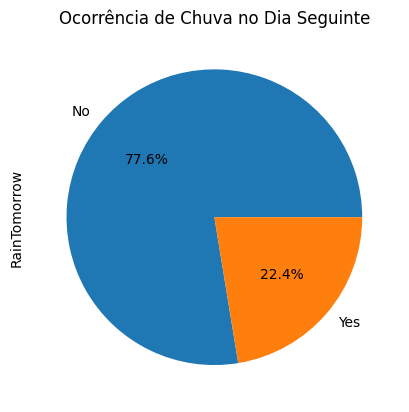

In [11]:
# distribuição das classes representadas grapelo gráfico de pizza
rain['RainTomorrow'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Ocorrência de Chuva no Dia Seguinte')
plt.show()

É possível observar que as classes "No" (não ocorrência de chuva) e "Yes"(ocorrência de chuva) estão desbalanceadas. O número de ocorrência de chuva ('Yes') no dia seguinte corresponde a cerca de 22,4% do total.

Iremos "guardar" esta informação, para verificação da necessidade de se realizar algum tipo de tratamento nas próximas etapas.

### 3.2. Visualizações Unimodais



####3.2.1. Histograma
A seguir iremos criar um histograma para cada atributo numérico do dataset.

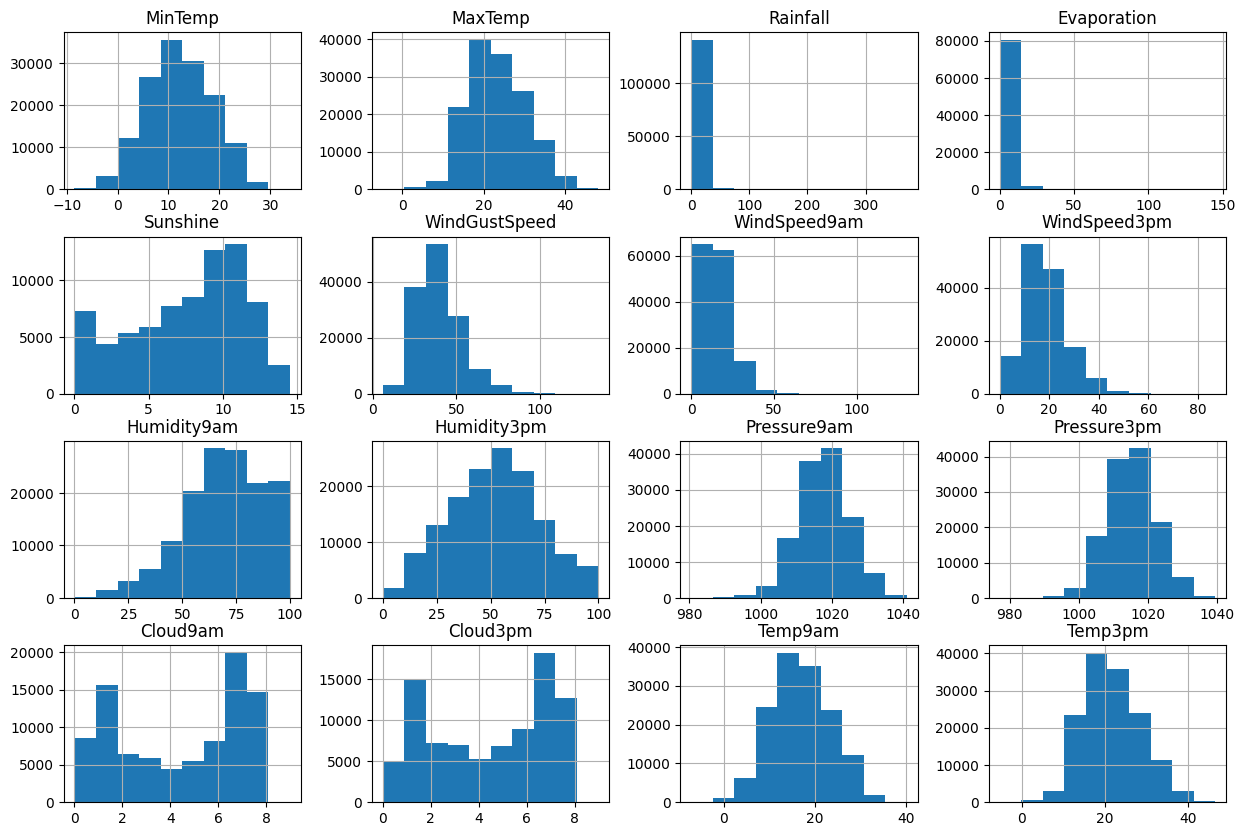

In [12]:
# Histograma
rain.hist(figsize = (15,10))
plt.show()

Observamos que os atributos MinTemp, MaxTemp, Humidity3pm, Temp9am e Temp3pm apresentam distribuição normal, com maior frequência de temperatura mínima em torno de 10 graus e temperatura máxima em torno de 20 graus.

Já os atributos WindGustSpeed e WindSpeed3pm apresentam distribuição assimétrica positiva e os atributos Pressure9am, Pressure3pm apresentam distribuição assimétrica negativa.

O atributo Humidity9am apresenta uma distribuição exponencial.

Os atributos Sunshine, Cloud9am e Cloud3pm apresentam distribuição bi-modal, com dois picos distintos, indicando a presença de dois subgrupos no conjunto de dados.

Já os atributos Rainfall e Evaporation apresentam distribuição assimétrica positiva. Porém, ressalta-se aqui, que essa distribuição pode estar sendo impactada por eventos pontuais e extremos.


####3.2.2. Gráfico de Densidade

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset.

Assim como fizemos com o histograma, vamos criar um density plot para cada atributo numérico do dataset.

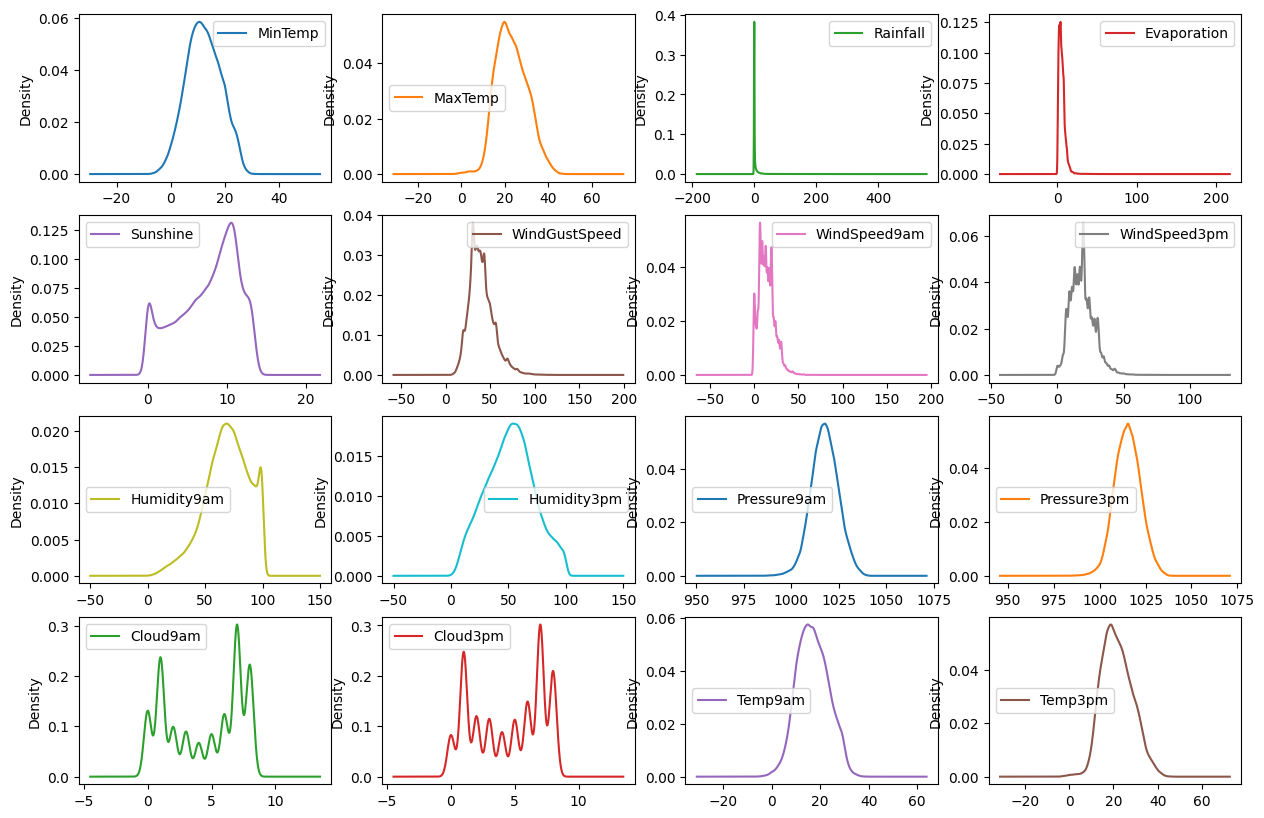

In [13]:
# Density Plot
rain.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False,
          figsize = (15,10))
plt.show()

Observa-se, por meio dos gráficos de densidade, os mesmos comportamentos dos atributos, conforme vistos por meio dos histogramas.

Como, por exemplo, uma clara distribuição normal dos atributos MinTemp, MaxTemp, Humidity3pm, Temp9am e Temp3pm. Assim como uma distribuição bi-modal, com dois picos distintos, para os atributos Sunshine, Cloud9am e Cloud3pm.



####3.2.3. Boxplot

Por meio dos boxplots pode-se ter uma ideia da dispersão dos dados no dataset e os possíveis outliers.

No boxblot, a linha no centro (verde) representa o valor da mediana (segundo quartil ou p50), a linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75).

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

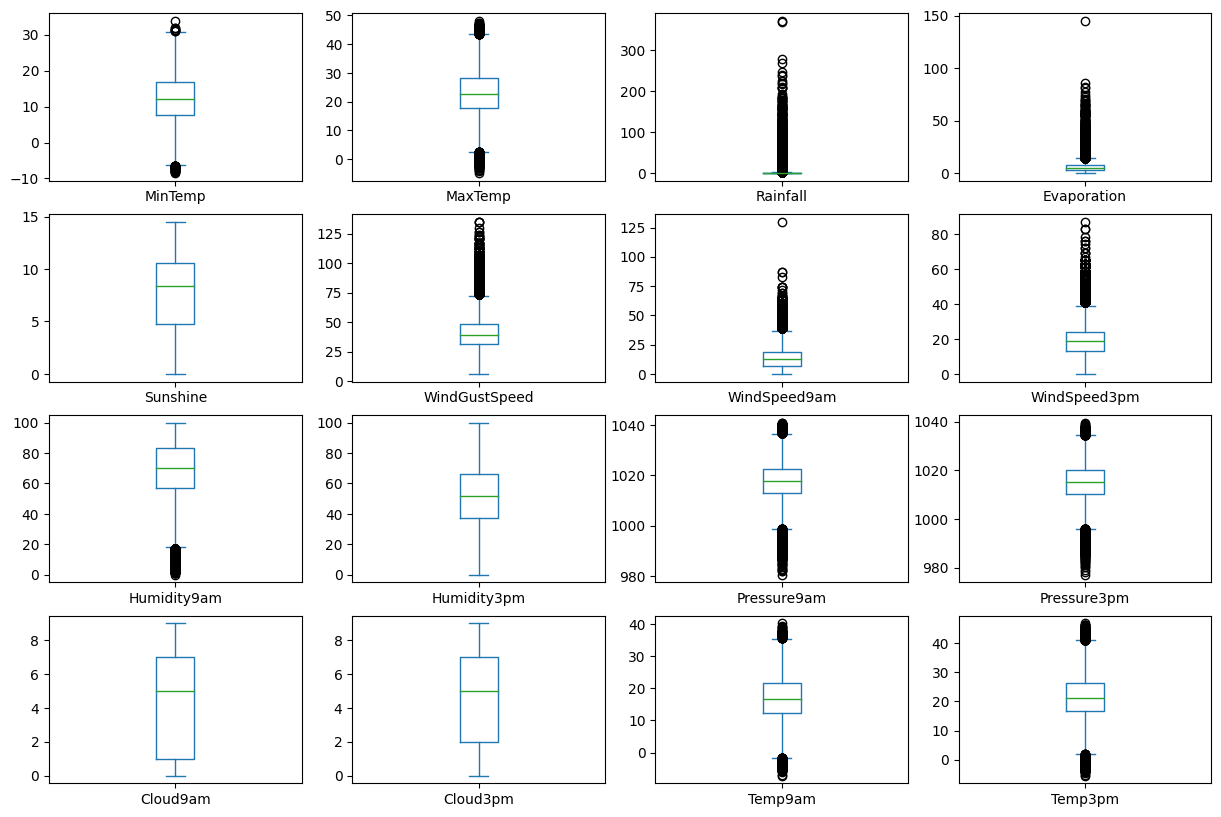

In [14]:
# Boxplot
rain.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False,
          sharey = False, figsize = (15,10))
plt.show()

Nos gráficos bloxplot, observa-se que a dispersão é bem diferente entre os atributos do dataset.

Conforme observado nos histogramas e nos gráficos de densidade, verifica-se um comportamento bem distribuído nos atributos MinTemp, MaxTemp, Humidity3pm, Temp9am e Temp3pm.

Observa-se que alguns atributos apresentam valores elevados extremos (terceiro quartil) como Rainfall, Evaporation, WindGustSpeed, WindSpeed9am e WindSpeed3pm. Enquanto outros apresentam valores baixos extremos (primeiro quartil) como Humidity9am, Pressure9am e Pressure3pm.

Posteriormente será analizada a necessidade de tratamento nesses dados, porém, ressalta-se que, eventos extremos, como por exemplo os valores observados no atributo Rainfall, podem ser importantes e necessários na análise dos dados, quando considera-se, por exemplo, que valores elevados de chuva podem estar associados ao risco de desastres naturais e seus respectivos impactos sociais. Dessa forma, não necessariamente esses valores serão considerados e tratados como outliers no dataset.

### 3.3. Visualizações Multimodais


A **covariância** representa como duas variáveis numéricas estão relacionadas em um dataset.

####3.3.1. Correlação de Pearson
Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

* Próximo de -1 : há uma correlação negativa entre as variáveis, ou seja, à medida que uma variável aumenta, a outra diminui linearmente.
* Próximo de +1: há uma correlação positiva entre as variáveis, ou seja, à medida que uma variável aumenta, a outra também aumenta linearmente.
* 0: não há correlação linear entre as variáveis.

OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados.

O coeficiente de correlação de Pearson é sensível apenas à relações lineares. Se a relação entre as variáveis não é linear, o coeficiente de correlação de Pearson pode não capturar completamente a força da relação.

É importante notar que a correlação não implica causalidade. Dois eventos podem estar correlacionados, mas isso não significa que um cause o outro.

A seguir é apresentada a correlação de Pearson para as variáveis numéricas do dataset estudado.

In [15]:
# Correlação de Pearson
rain.corr(method = 'pearson')

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

Ao visualizar as correlações entre os atributos através do método de Pearson acima, ou da matriz de correlação, a seguir, perceberemos que parece haver alguma estrutura na ordem dos atributos.

####3.3.2. Matriz de Correlação

A seguir é apresentada a matriz de correlação entre os atributos numéricos do dataset.

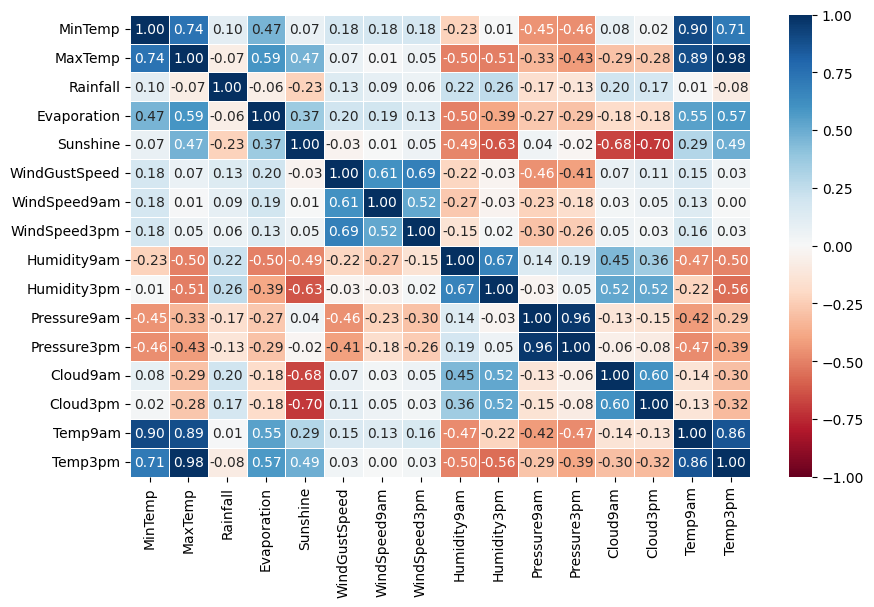

In [16]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(rain.corr(), annot=True, fmt = ".2f", cmap='RdBu', linewidths=.5,
            vmin=-1, vmax=1);


Observa-se, predominantemente uma coloração azul ao redor da diagonal, em seu trecho superior, o que sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si.

Os vermelhos, presentes no trecho inferior da diagonal, sugerem alguma correlação negativa leve, além de uma correlação negativa moderada entre os atributos Humidity3pm, Cloud9am e Cloud3pm com o atributo Sunshine.

Outras características na correlação entre os atributos serão observadas adiante.

####3.3.3. Scatter Plot
O gráfico de dispersão (scatter plot) mostra como duas variáveis numéricas do dataset se relacionam.

A seguir é apresentada a relação de cada par de atributos do dataset, usando o Seaborn.

De forma a se diminuir o tempo de processamento e facilitar a visualização dos gráficos gerados, optou-se por definir para apresentação apenas os atributos que apresentaram maiores valores de correlação observados na matriz de correlação (>0,5 ou <-0,5).

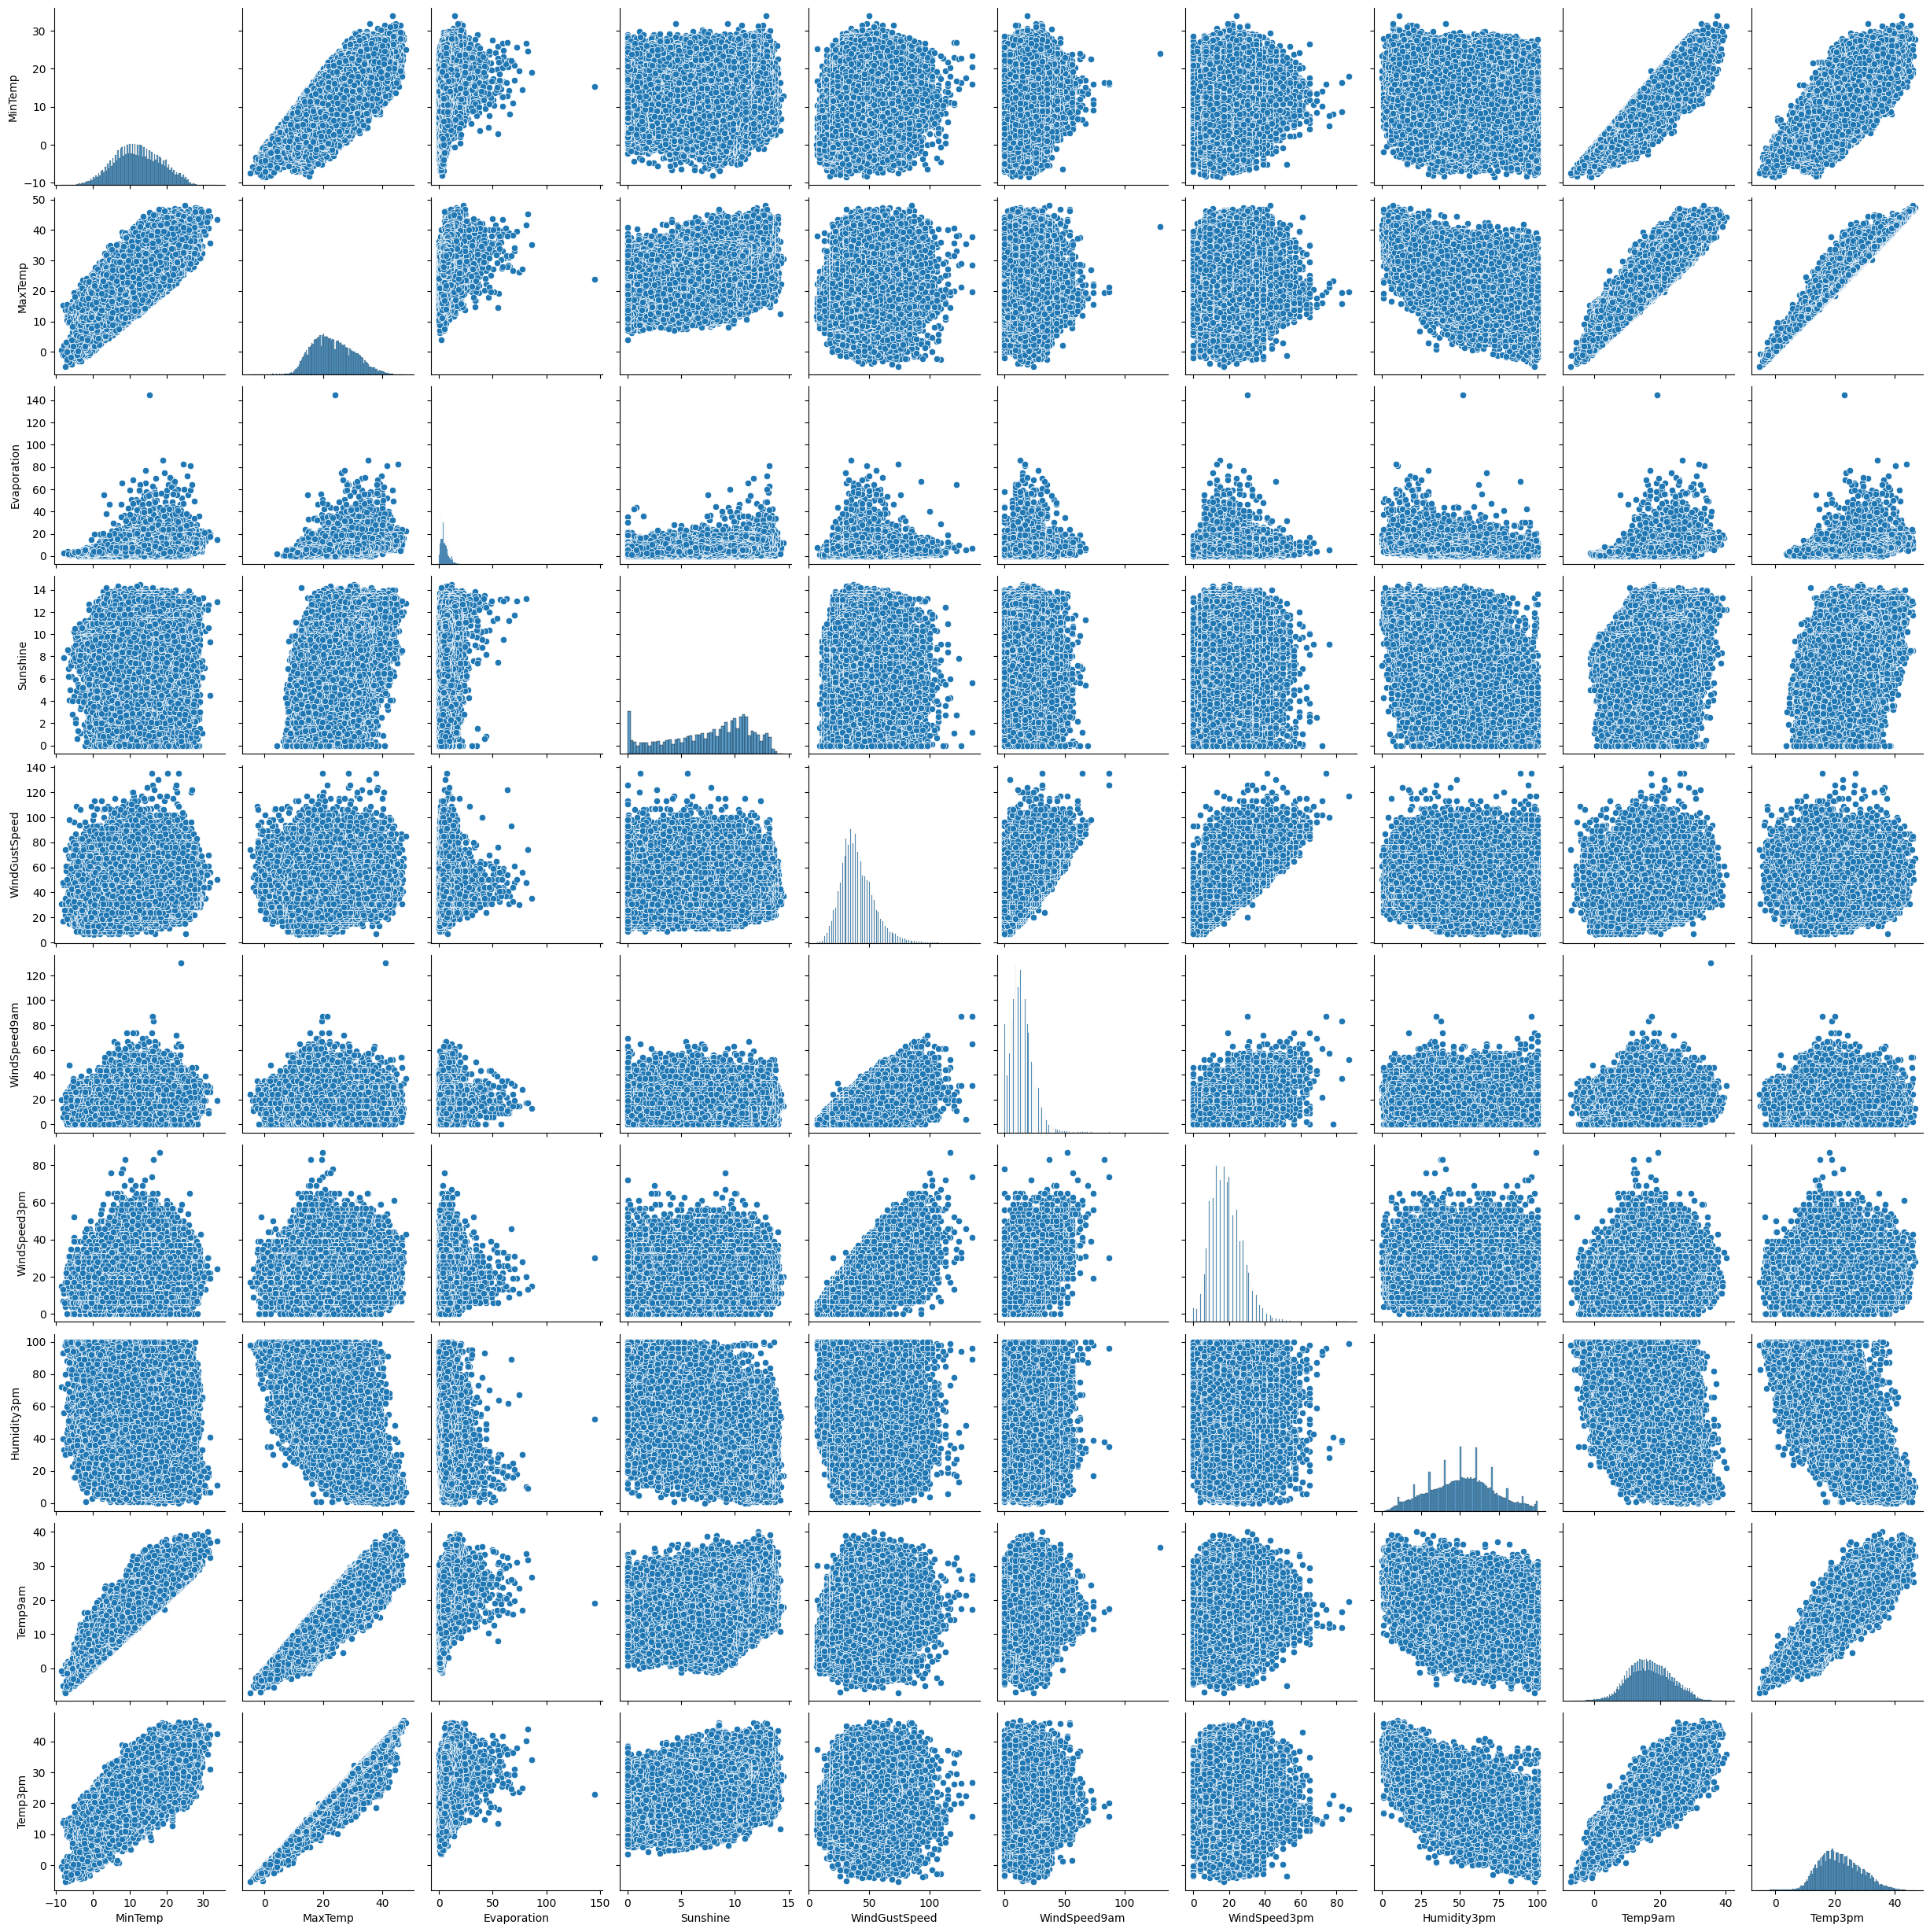

In [17]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(rain[['MinTemp','MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed',
                   'WindSpeed9am', 'WindSpeed3pm','Humidity3pm','Temp9am','Temp3pm']])

Por meio dos gráficos de dispersão, observa-se uma correlação positiva entre os atributos MaxTemp e MinTemp com os atributos Temp9am e Temp3pm. Essa relação já seria esperada, pois são todos atributos relacionados à temperatura.

Da mesma forma, observa-se uma correlação positiva entre os atributos  WindGustSpeed com os atributos WindSpeed9am e WindSpeed3pm, atributos relacionados à velocidade do vento.

Outra correlação que pode ser observada é entre os atributos de temperatura e o atributo Sunshine, onde verifica-se uma tendência a uma correlação positiva, o que significaria que maiores temperaturas estariam associadas a um maior número de horas de sol brilhante.

Assim como uma correlação negativa entre os atributos MaxTemp, Temp9am e Temp3pm, e o atributo Humidity9am onde, para maiores temperaturas observa-se uma umidade menor, e vice-versa.

Os demais atributos apresentaram aparente correlação nula.


####3.3.4. Scatter Plot com comparação de classe

De forma semelhante à realizada anteriormente, optou-se por apresentar apenas alguns atributos para relação com o atributo classe de nosso dataset, ocorrência ou não de chuva no dia seguinte.

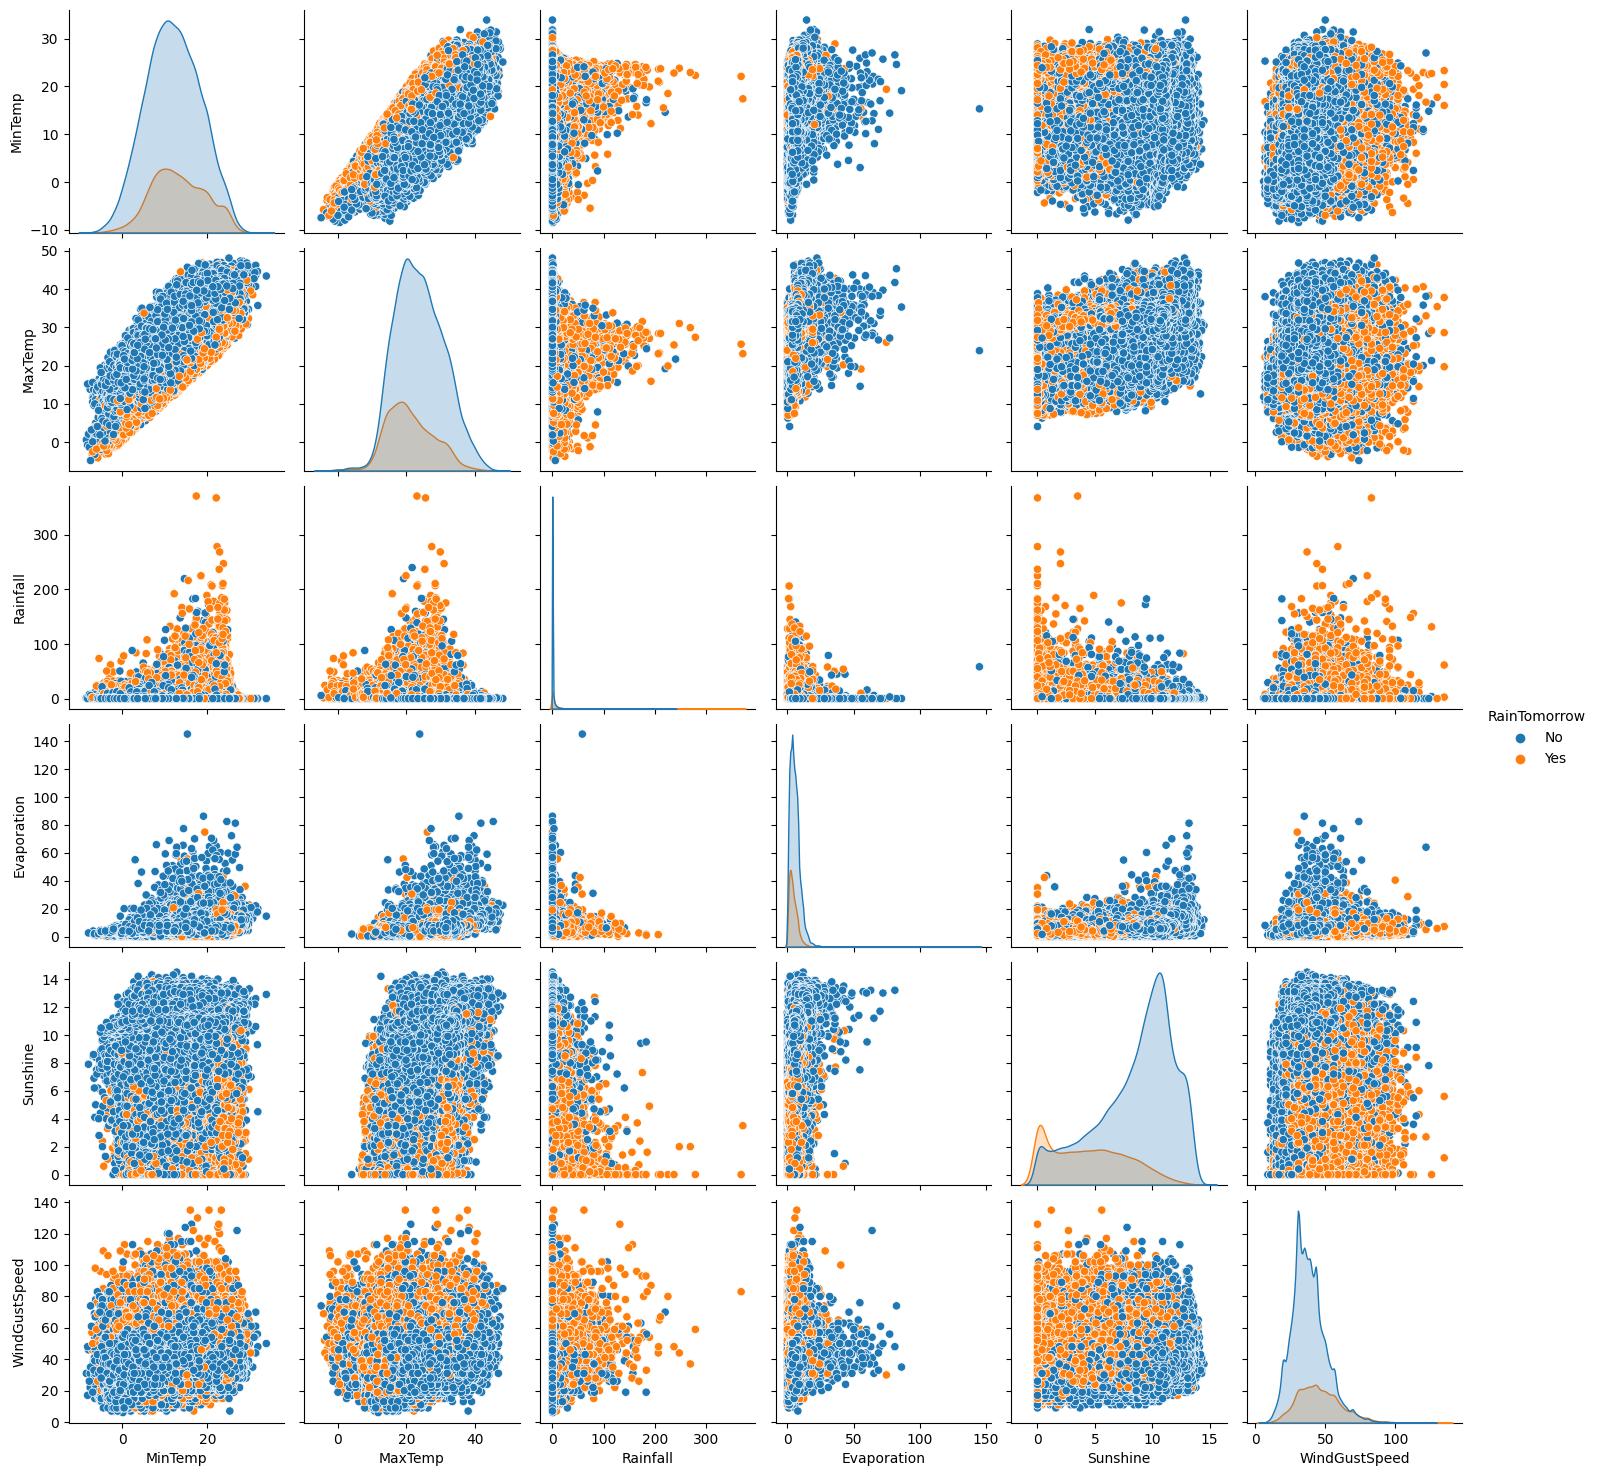

In [18]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(rain[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
                   'WindGustSpeed','RainTomorrow']], hue = "RainTomorrow",
             height = 2.5)

Por meio dos gráficos de dispersão, assim como visto anteriormente, observa-se uma correlação positiva entre os atributos MaxTemp e MinTemp. Quando comparado com o atributo classe do dataset (ocorrência de chuva no dia seguinte), observa-se uma correlação positiva forte entre os referidos atributos.

Outra observação é uma tendência a uma correlação positiva, entre os atributos MaxTemp e o atributo Sunshine, que significaria que maiores temperaturas estariam associadas a um maior número de horas de sol brilhante. Porém, a correlação com o atributo classe é fraca, pois observa-se uma maior dispersão dos dados.

Os demais atributos apresentaram aparente correlação nula, tanto entre os atributos quanto em relação ao atributo classe.



####3.3.5. Tabela Frequência Cruzada

Com o intuito de se observar se existe relação entre o atributo 'RainToday' e o atributo classe 'Raintomorrow', é feita uma tabela de referência cruzada.

In [19]:
# Criar a tabela de frequência cruzada
tabela_frequencia = pd.crosstab(rain['RainToday'], rain['RainTomorrow'])

# Adicione totais (opcional)
tabela_frequencia['Total'] = tabela_frequencia.sum(axis=1)
tabela_frequencia.loc['Total'] = tabela_frequencia.sum()

# Visualize a tabela de frequência cruzada
print(tabela_frequencia)

RainTomorrow      No    Yes   Total
RainToday                          
No             92728  16604  109332
Yes            16858  14597   31455
Total         109586  31201  140787


Observa-se, pela tabela de referência cruzada, que a 'não ocorrência' de chuva no dia atual e a 'não ocorrência' de chuva no dia seguinte estão bem relacionadas.

Porém, com distribuição semelhante, estão as demais situações ('ocorrência de chuva' no dia atual e 'não ocorrência' no dia seguinte, 'não ocorrência' no dia atual e 'ocorrência' no dia seguinte, e 'ocorrência' no dia atual e no dia seguinte).

Dessa forma, não é possível, por meio da tabela de referência cruzada, estabelecer uma relação direta entre a ocorrência de chuva no dia atual e no dia seguinte.




## 4. Pré-Processamento de Dados

Na etapa de pré-processamento de dados são realizadas diversas operações de preparação dos dados para modelos de aprendizado de máquina.

Serão realizados o tratamento de valores missings (faltantes), a limpeza dos dados, transformações de variáveis categóricas em numéricas, utilizando-se o ordinal encoding e dummy variable encoder, a separação dos dados em conjunto de treino e teste, e a normalização dos dados e padronização dos dados, para posterior utilização em modelos de machine learning.

### 4.1. Tratamento de Missings e Limpeza

Conforme observado anteriormente, na etapa de carregamento dos dados, sabemos que o dataset estudado possui valores faltantes.

Dessa forma, iremos, primeiramente, verificar os valores nulos (faltantes) em nossa base de dados, para então definir como tratá-los.

In [20]:
# verificando nulls no dataset
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Observa-se que nosso atributo classe (RainTomorrow) possui valores faltantes.

Considerando-se que o número de valores faltantes (3267) corresponde a cerca de 0,02% das instâncias de nosso dataset (145.460) iremos, então, excluir as mesmas de nosso dataset.

In [21]:
# Remover linhas com valores nulos na coluna RainTomorrow
rain = rain.dropna(subset=['RainTomorrow'])

# Exibir DataFrame resultante
print(rain)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

####4.1.1. Criando um novo dataset

Nesse momento se faz necessário salvar um novo dataset para o tratamento dos valores faltantes.

Esse novo dataset não irá considerar a coluna 'RainTomorrow', nossa coluna alvo.

<Axes: >

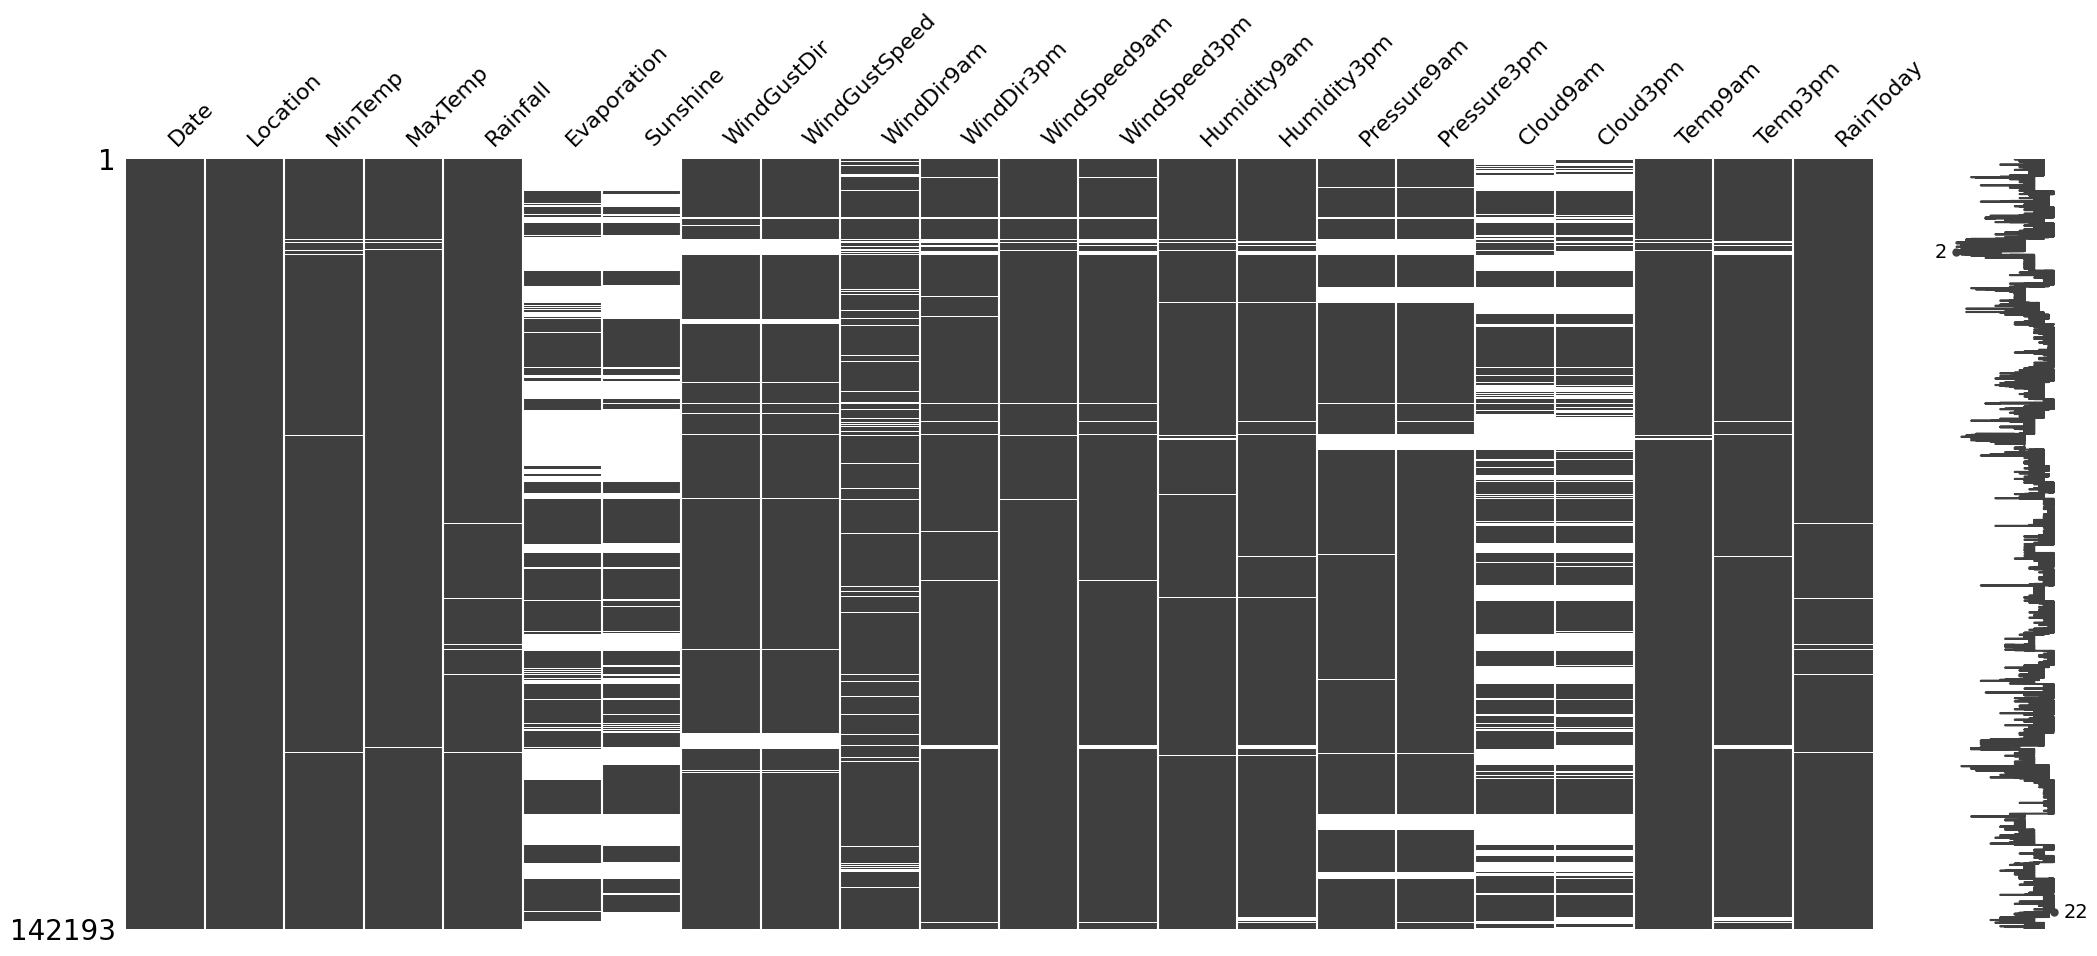

In [22]:
# salvando um NOVO dataset para tratamento de missings
# recuperando os nomes das colunas
col = list(rain.columns)

# o novo dataset irá conter todas as colunas com exceção da última (RainTomorrow)
n_rain = rain[col[0:-1]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(n_rain)

Assim como visto anteriormente, observa-se pela matriz de nulidade do dataset que alguns atributos apresentam um número considerável de valores faltantes, cerca de 48% das instâncias dos referidos atributos.

Dessa forma, optou-se por excluir esses atributos ('Cloud9am' e 'Cloud3pm'), assim como os atributos categóricos 'Location', 'WindDir9am' e 'WindDir3pm', pois considera-se que não exercem influência direta na análise que está sendo realizada no rpesente trabalho.

<Axes: >

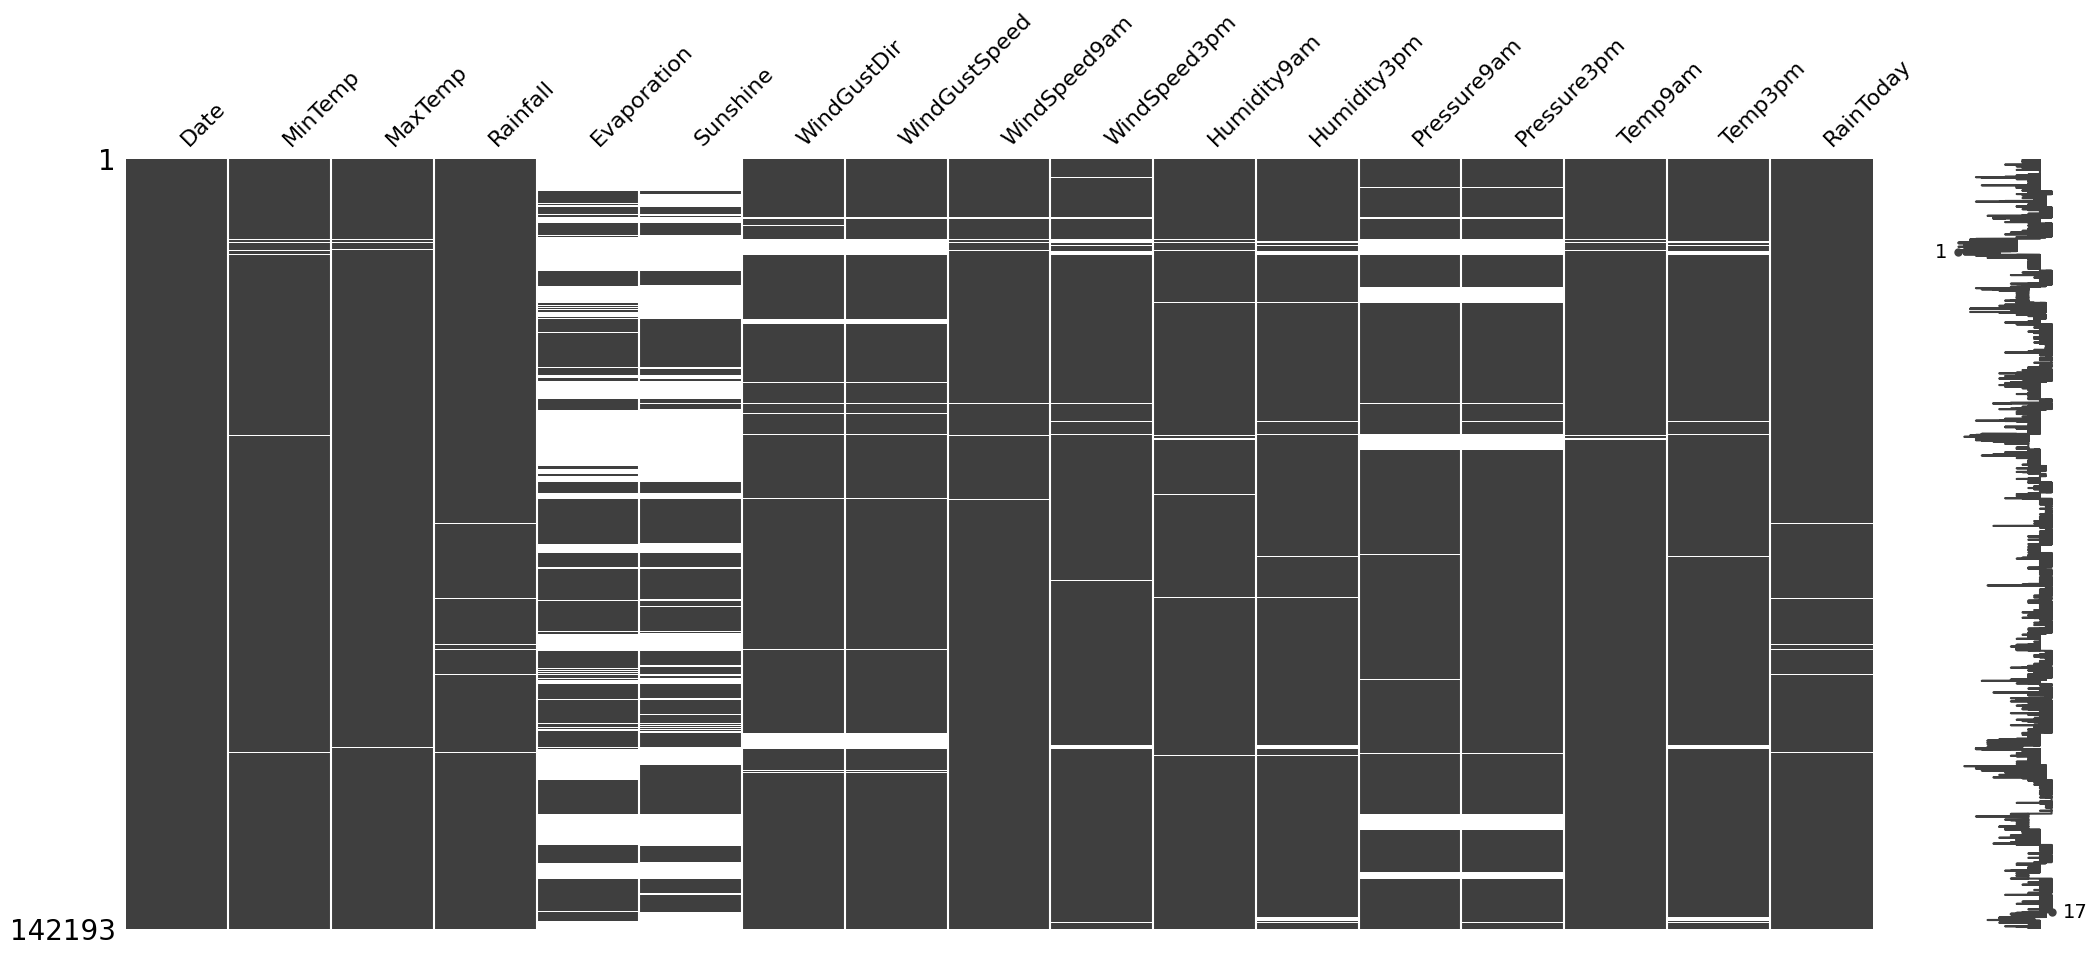

In [23]:
# removendo colunas
n_rain.drop(['Location','WindDir9am','WindDir3pm',
             'Cloud9am', 'Cloud3pm'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(n_rain)

Em seguida serão eliminadas, caso hajam, as linhas onde todos os valores são faltantes.

<Axes: >

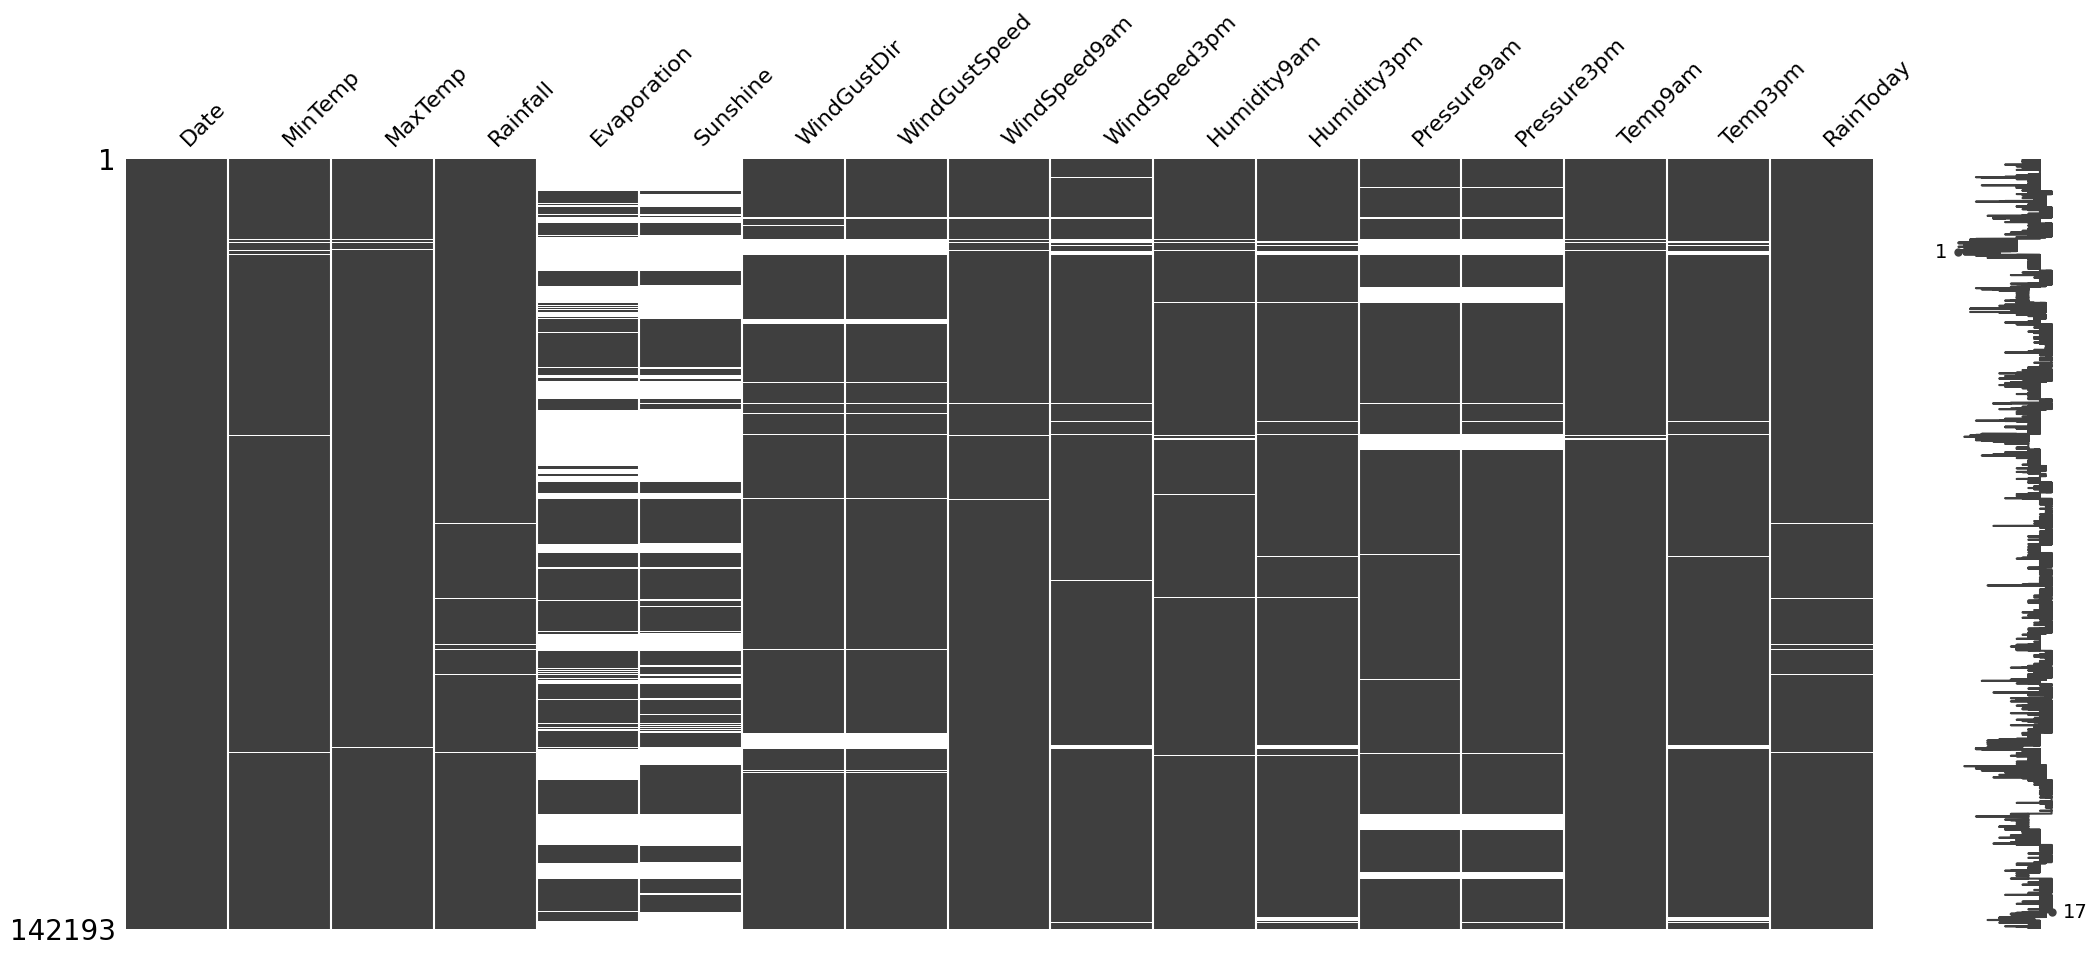

In [24]:
# eliminando linhas que tenham TODOS os valores missing
n_rain = n_rain.dropna(how='all')

# exibindo visualização matricial da nulidade do dataset
ms.matrix(n_rain)


Verificando-se, novamente a quantidade de valores faltantes por atributo.

In [25]:
# verificando nulls no dataset
n_rain.isnull().sum()

Date                 0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

A seguir será realizada a substituição dos valores faltantes.

Para os atributos 'MinTemp' e 'MaxTemp', serão considerados os últimos valores preenchidos pois, considerar a temperatura da data anterior mais próxima, tende a ser mais realista do que algum parâmetro estatístico.

Para os atributos "Evaporation', 'Sunshine' e 'Rainfall', serão consideradas as medianas das colunas.

<Axes: >

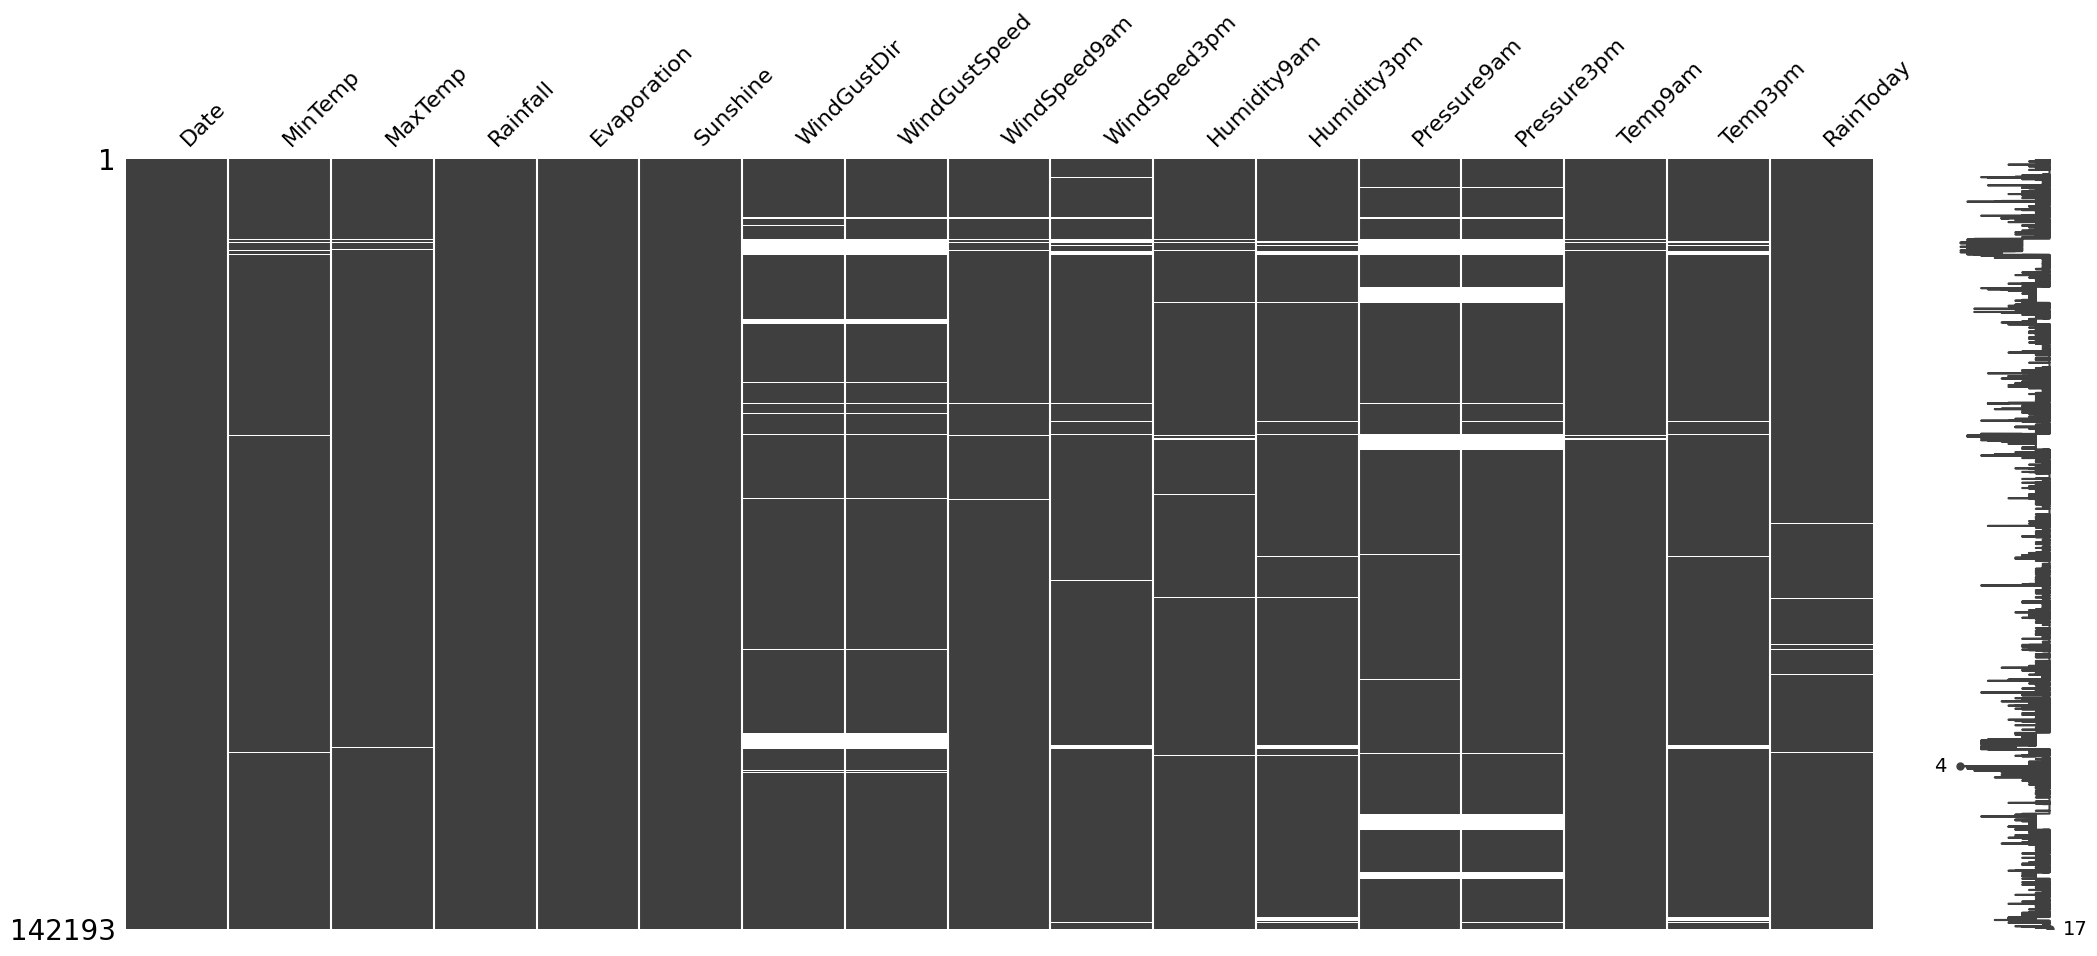

In [26]:
# substituindo os valores nulls de Min e Max Temp pelo último valor preenchido

n_rain ['MinTemp'].bfill(axis=0)
n_rain ['MaxTemp'].bfill(axis=0)

# substituindo os nulls de 'Evaporation', 'Sunshine' e 'Rainfall' pela
# mediana da coluna
n_rain ['Evaporation'].fillna(n_rain ['Evaporation'].median(), inplace=True)
n_rain ['Sunshine'].fillna(n_rain ['Sunshine'].median(), inplace=True)
n_rain ['Rainfall'].fillna(n_rain ['Rainfall'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(n_rain)

In [27]:
# verificando nulls no dataset
n_rain.isnull().sum()

Date                 0
MinTemp            637
MaxTemp            322
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

Observa-se que ainda existem linhas com valores faltantes.

Dessa forma optou-se por eliminar todas as linhas que tenham algum valor faltante.

<Axes: >

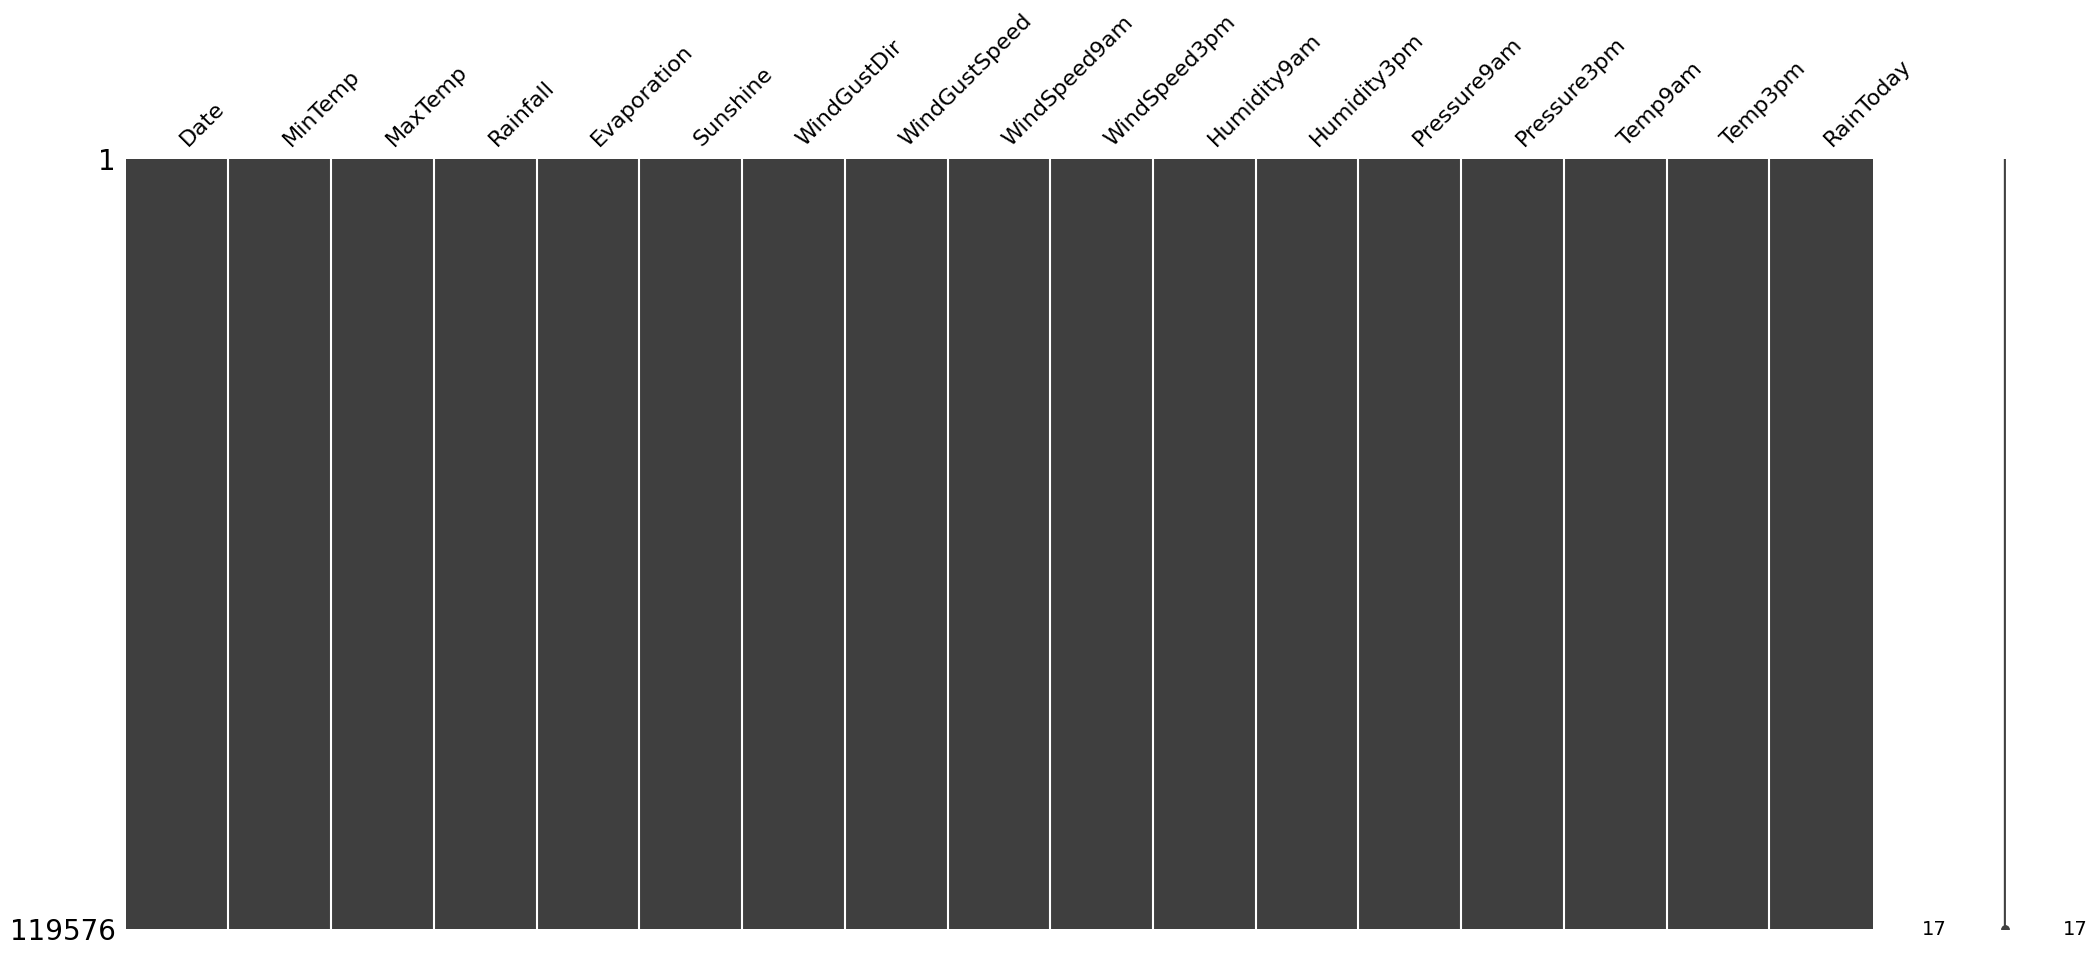

In [28]:
# eliminando linhas que tenham algum dos valores missing
n_rain = n_rain.dropna(how='any')

# exibindo visualização matricial da nulidade do dataset
ms.matrix(n_rain)

In [29]:
# verificando nulls no dataset
n_rain.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

Observa-se, então, pela matriz de nulidade, assim como pelas informações por atributos, que o dataset tratado não possui mais nenhum valor faltante.

####4.1.2. Criando um novo dataset tratado

Cria-se um novo dataset, já com o tratamento dos valores faltantes e limpeza dos dados, que poderá ser utilizado para testes futuros.

Nesse momento será incluída de volta a coluna alvo 'RainTomorrow', e iremos verificar as primeiras linhas desse novo dataset.

In [30]:
# Guardando o novo dataset para testes futuros
rainSemMissings = n_rain

# incluindo a coluna 'RainTomorrow' no novo dataset
rainSemMissings['RainTomorrow'] = rain['RainTomorrow']

# exibindo as primeiras linhas
rainSemMissings.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2008-12-01     13.4     22.9       0.6          4.8       8.5           W   
1  2008-12-02      7.4     25.1       0.0          4.8       8.5         WNW   
2  2008-12-03     12.9     25.7       0.0          4.8       8.5         WSW   
3  2008-12-04      9.2     28.0       0.0          4.8       8.5          NE   
4  2008-12-05     17.5     32.3       1.0          4.8       8.5           W   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0           44.0          20.0          24.0         71.0         22.0   
1           44.0           4.0          22.0         44.0         25.0   
2           46.0          19.0          26.0         38.0         30.0   
3           24.0          11.0           9.0         45.0         16.0   
4           41.0           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

Confirma-se que o novo dataset não tem valores faltantes.

In [31]:
# verificando nulls no dataset
rainSemMissings.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Verificando-se como está a distribuição das classes no dataset tratado.

In [32]:
# distribuição das classes
print(rainSemMissings.groupby('RainTomorrow').size())

RainTomorrow
No     93395
Yes    26181
dtype: int64


Observa-se que as classes "No" (não ocorrência de chuva) e "Yes" (ocorrência de chuva) continuam desbalanceadas. O número de ocorrência de chuva no dia seguinte corresponde a cerca de 21,9% do total.

Ou seja, mesmo após o tratamento dos dados faltantes a proporção das classes, observada antes do tratamento dos dados, se mantêm em relação ao total.

Iremos, dessa forma, tratar esse desbalanceamento mais adiante.

###4.2. Tratamento de dados categóricos

Faz-se necessário a realização de tratamento nos dados categóricos do dataset.

Dessa forma, verifica-se o tipo de cada atributo do dataset.

In [33]:
# Verifica o tipo de dataset de cada atributo
rainSemMissings.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Os atributos 'Date', 'WindGustDir', 'RainToday' e 'RainTomorrow' deverão ser tratados.

Inicialmente será realizada a conversão da coluna data/hora para o formato de data e em seguida para números de ponto flutuante, e serão convertidos os nanossegundos para segundos.

In [34]:
# Alterando o tipo da coluna "Data"
rainSemMissings['Date'] = pd.to_datetime(rainSemMissings['Date'])

# Convertendo a coluna de data/hora para números de ponto flutuante
rainSemMissings['Date'] = rainSemMissings['Date'].astype(int) / 10**9 # Convertendo nanossegundos para segundos


Em seguida é aplicada o Ordinal Encoding nos atributos 'WindGustDir', de forma a substituir as informações de direção do vento em variáveis numéricas do tipo 'int'.

Verificaremos as primeiras linhas do dataset com os tratamentos realizados.

In [35]:
# Aplicando Ordinal Encoding
rainSemMissings['WindGustDir']=rainSemMissings['WindGustDir'].replace({'E':'0',
                                              'ENE':'1', 'ESE':'2', 'N':'3',
                                              'NE':'4','NNE':'5','NNW':'6',
                                              'NW':'7','S':'8','SE':'9',
                                              'SSE':'10','SSW':'11','SW':'12',
                                              'W':'13','WNW':'14','WSW':'15'}).astype(int)

rainSemMissings.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  1.228090e+09     13.4     22.9       0.6          4.8       8.5   
1  1.228176e+09      7.4     25.1       0.0          4.8       8.5   
2  1.228262e+09     12.9     25.7       0.0          4.8       8.5   
3  1.228349e+09      9.2     28.0       0.0          4.8       8.5   
4  1.228435e+09     17.5     32.3       1.0          4.8       8.5   

   WindGustDir  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           13           44.0          20.0          24.0         71.0   
1           14           44.0           4.0          22.0         44.0   
2           15           46.0          19.0          26.0         38.0   
3            4           24.0          11.0           9.0         45.0   
4           13           41.0           7.0          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  \
0         22.0       1007.7       1007.1     16.9     21.8        No   
1         25.0       1010.6       1007.8     17.2     24.3        No   
2         30.0       1007.6       1008.7     21.0     23.2        No   
3         16.0       1017.6       1012.8     18.1     26.5        No   
4         33.0       1010.8       1006.0     17.8     29.7        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

Para atribuição de variáveis numéricas no atributo 'RainToday' e no atributo alvo 'RainTomorrow', será utilizado o Dummy variable encoder.

Em seguida o novo dataset é impresso.

In [36]:
# definindo o transformador como one hot encoding (com Dummy variable encoder)
encoder = OneHotEncoder(drop='first', sparse=False)

# transformando os dados
rain_encoded = pd.get_dummies(rainSemMissings, columns=['RainToday','RainTomorrow'])

#dummy = encoder.fit_transform(rainSemMissings)
print(rain_encoded)

                Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       1.228090e+09     13.4     22.9       0.6          4.8       8.5   
1       1.228176e+09      7.4     25.1       0.0          4.8       8.5   
2       1.228262e+09     12.9     25.7       0.0          4.8       8.5   
3       1.228349e+09      9.2     28.0       0.0          4.8       8.5   
4       1.228435e+09     17.5     32.3       1.0          4.8       8.5   
...              ...      ...      ...       ...          ...       ...   
145454  1.497917e+09      3.5     21.8       0.0          4.8       8.5   
145455  1.498003e+09      2.8     23.4       0.0          4.8       8.5   
145456  1.498090e+09      3.6     25.3       0.0          4.8       8.5   
145457  1.498176e+09      5.4     26.9       0.0          4.8       8.5   
145458  1.498262e+09      7.8     27.0       0.0          4.8       8.5   

        WindGustDir  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0                13 

Observando-se as primeiras linhas do novo dataset com os dados numéricos.

In [37]:
rain_encoded.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  1.228090e+09     13.4     22.9       0.6          4.8       8.5   
1  1.228176e+09      7.4     25.1       0.0          4.8       8.5   
2  1.228262e+09     12.9     25.7       0.0          4.8       8.5   
3  1.228349e+09      9.2     28.0       0.0          4.8       8.5   
4  1.228435e+09     17.5     32.3       1.0          4.8       8.5   

   WindGustDir  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           13           44.0          20.0          24.0         71.0   
1           14           44.0           4.0          22.0         44.0   
2           15           46.0          19.0          26.0         38.0   
3            4           24.0          11.0           9.0         45.0   
4           13           41.0           7.0          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday_No  \
0         22.0       1007.7       1007.1     16.9     21.8             1   
1         25.0       1010.6       1007.8     17.2     24.3             1   
2         30.0       1007.6       1008.7     21.0     23.2             1   
3         16.0       1017.6       1012.8     18.1     26.5             1   
4         33.0       1010.8       1006.0     17.8     29.7             1   

   RainToday_Yes  RainTomorrow_No  RainTomorrow_Yes  
0              0                1                 0  
1              0                1                 0  
2              0                1                 0  
3              0                1                 0  
4              0                1                 0

###4.3. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), que corresponde a uma amostra dos dados que não será usada para a construção do modelo. Na etapa de  construção de um modelo de aprendizagem de máquina, esse conjunto de teste será utilizado no final, para confirmar a precisão do modelo construído. É um teste que pode ser utilizado para verificar o quão boa foi a construção do modelo, e para dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos.

Dessa forma, usaremos 80% do conjunto de dados para modelagem (chamado conjunto de treino) e guardaremos 20% para teste, usando a estratégia "train-test-split".

Primeiramente, iremos sinalizar quais são as colunas de atributos (X) e qual é a coluna das classes (Y). Em seguida, especificaremos o tamanho do conjunto de teste desejado (20%) e uma semente (para garantir a reprodutibilidade dos resultados).

Por fim, faremos a separação dos conjuntos de treino e teste através do comando "train_test_split", que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

Ressalta-se que essa separação em conjunto de treino e teste, deve ser realizada anteriormente à normalização e padronização dos dados, de forma a evitar o vazamento de dados (data leakage). Ou seja, de forma a se evitar que algum conhecimento sobre o conjunto de teste vaze para o conjunto de dados usado para treinar o modelo, podendo resultar em uma estimativa incorreta do desempenho do modelo ao fazer predições sobre novos dados.

A separação em conjunto de treino e teste será feita tanto para o dataset original, como para o dataset tratado (sem missings e somente dados numéricos).

Ressalta-se aqui que, devido ao desbalanceamento das classes observado em nosso dataset, no momento da separação em conjunto de treino e teste será utilizada a validação estratificada, de forma a garantir que as proporções das classes sejam mantidas em ambos os conjuntos.


In [38]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = rain.values
X_or = array[:,0:22]
y_or = array[:,22]

X_train, X_test, y_train, y_test = train_test_split(X_or, y_or,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_or) # com estratificação

In [39]:
# Separação em conjuntos de treino e teste (dataset tratado)
array_sm = rain_encoded.values
X_sm = array_sm[:,0:18]
y_sm = array_sm[:,18:20]

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

###4.4. Normalização

Podemos utilizar as operações de normalização e padronização usando a biblioteca Scikit-learn.

A fórmula correspondente à normalização dos dados é representada a seguir.

y = (x – min) / (max – min)

Ressalta-se que, mesmo se as distribuições dos atributos forem normais, isso não implica automaticamente que todas as variáveis tenham escalas semelhantes.

Conforme observado anteriormente, algumas variáveis têm médias e desvios padrão muito diferentes. Normalizar pode ajudar a lidar com essas diferenças.

Em técnicas de redução de dimensionalidade, como PCA (Principal Component Analysis), a normalização é frequentemente recomendada, independentemente da forma da distribuição. Isso ajuda a garantir que as componentes principais sejam influenciadas de maneira equitativa por todas as variáveis.











In [41]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X_sm)

# Exibindo os dados transformados
print("Dados Originais: \n\n", rain_encoded.values)
print("\nDados Normalizados (não inclui a coluna 'RainTomorrow'): \n\n", rescaledX)

Dados Originais: 

 [[1.2280896e+09 1.3400000e+01 2.2900000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.2281760e+09 7.4000000e+00 2.5100000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.2282624e+09 1.2900000e+01 2.5700000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 ...
 [1.4980896e+09 3.6000000e+00 2.5300000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.4981760e+09 5.4000000e+00 2.6900000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.4982624e+09 7.8000000e+00 2.7000000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]]

Dados Normalizados (não inclui a coluna 'RainTomorrow'): 

 [[0.1123723  0.51306413 0.44615385 ... 0.44666667 1.         0.        ]
 [0.11265607 0.37054632 0.49450549 ... 0.50222222 1.         0.        ]
 [0.11293984 0.50118765 0.50769231 ... 0.47777778 1.         0.        ]
 ...
 [0.99914869 0.28028504 0.4989011  ... 0.50666667 1.         0.        ]
 [0.99943246 0.32304038 0.53406593 ... 0.54222222 1.      

###4.5. Padronização

A fórmula correspondente à padronização dos dados é representada a seguir.

média = soma (x) / contagem (x)

desvio_ padrão = sqrt (soma ((x - média) ^ 2) / contagem (x))

y = (x - média) / desvio padrão

A padronização é o processo de transformar os dados de modo que tenham uma média zero e um desvio padrão de um. Isso é feito subtraindo a média de cada valor e dividindo pelo desvio padrão.

A padronização torna os atributos comparáveis entre si, garantindo que todos contribuam de maneira equitativa para o modelo. Isso é particularmente importante em algoritmos que usam medidas de distância, onde a escala dos atributos pode influenciar significativamente os resultados.

A padronização pode, ainda, tornar o modelo mais robusto em relação a outliers, uma vez que os valores são expressos em termos de desvios padrão e não em unidades originais. Porém, ressalta-se que a padronização não elimina a necessidade de, se necessário, lidar diretamente com outliers.


In [42]:
# Padronização
# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(X_sm)

# Exibindo os dados transformados
print("Dados Originais: \n\n", rain_encoded.values)
print("\nDados Padronizados (não inclui a coluna 'RainTomorrow'): \n\n", scaled)


Dados Originais: 

 [[1.2280896e+09 1.3400000e+01 2.2900000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.2281760e+09 7.4000000e+00 2.5100000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.2282624e+09 1.2900000e+01 2.5700000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 ...
 [1.4980896e+09 3.6000000e+00 2.5300000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.4981760e+09 5.4000000e+00 2.6900000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.4982624e+09 7.8000000e+00 2.7000000e+01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]]

Dados Padronizados (não inclui a coluna 'RainTomorrow'): 

 [[-1.72178817  0.1592181  -0.08385459 ... -0.02613446  0.53269304
  -0.53269304]
 [-1.72069706 -0.78308787  0.23103981 ...  0.33975245  0.53269304
  -0.53269304]
 [-1.71960596  0.08069261  0.3169201  ...  0.17876221  0.53269304
  -0.53269304]
 ...
 [ 1.68792307 -1.37988165  0.25966657 ...  0.3690234   0.53269304
  -0.53269304]
 [ 1.68901417 -1.09718986 

## Conclusão

O objetivo do presente trabalho foi realizar uma análise e o pré-processamento dos dados de um dataset, com aproximadamente 10 anos de observações meteorológicas diárias de diferentes localidades da Austrália, e prepará-lo para a construção de um modelo de aprendizagem de máquina, que possibilitará prever se terá chuva no dia seguinte ou não.

Foi realizada uma análise estatística da base de dados onde observou-se, entre outros, que alguns atributos apresentaram um número expressivo de valores faltantes, além de alto desvio padrão, indicando maior variabilidade nos dados, observado na maioria das variáveis.

Por meio das visualizações unimodais realizadas, histograma e gráfico de densidade, observou-se que alguns atributos (MinTemp, MaxTemp, Humidity3pm, Temp9am e Temp3pm) apresentam distribuição normal, enquanto outros (WindGustSpeed e WindSpeed3pm) apresentaram distribuição assimétrica positiva e os outros (Pressure9am e Pressure3pm) apresentaram distribuição assimétrica negativa. Um atributo (Humidity9am) apresentou uma distribuição exponencial, e três atributos (Sunshine, Cloud9am e Cloud3pm) apresentam distribuição bi-modal, com dois picos distintos, indicando a presença de dois subgrupos no conjunto de dados. Outros dois atributos (Rainfall e Evaporation) apresentaram distribuição assimétrica positiva, que pode ter sido impactada por eventos pontuais e extremos.

Nos gráficos bloxplot, observou-se que a dispersão é bem diferente entre os atributos do dataset. Conforme observado nos histogramas e nos gráficos de densidade, verificou-se um comportamento bem distribuído nos atributos MinTemp, MaxTemp, Humidity3pm, Temp9am e Temp3pm. Porém, alguns atributos apresentaram valores elevados extremos (terceiro quartil) como Rainfall, Evaporation, WindGustSpeed, WindSpeed9am e WindSpeed3pm, enquanto outros apresentam valores baixos extremos (primeiro quartil) como Humidity9am, Pressure9am e Pressure3pm.

É importante destacar que, em nossa análise de dados, eventos extremos, como por exemplo os valores observados no atributo Rainfall, são importantes e necessários a serem considerados, visto que, por exemplo, valores elevados de chuva podem estar associados ao risco de desastres naturais e seus respectivos impactos sociais.

Por meio das visualizações multimodais, como matriz de correlação e gráficos de dispersão, foi possível observar tanto correlações positivas, quanto correlações negativas e aparente correlação nula entre os atributos.

É importante ressaltar que a correlação não implica causalidade. Dois eventos podem estar correlacionados, mas isso não significa que um cause o outro.

Por meio da tabela de referência cruzada, observou-se que apenas a 'não ocorrência' de chuva no dia atual e a 'não ocorrência' de chuva no dia seguinte estavam bem relacionadas. Dessa forma, por meio da tabela de referência cruzada, não foi possível estabelecer uma relação direta entre a ocorrência de chuva no dia atual e no dia seguinte.

Na etapa de pré-processamento de dados, foram realizados o tratamento de valores missings (faltantes) e a limpeza dos dados, com a exclusão de atributos, julgados não necessários na presente análise, a substituição de valores faltantes e a exclusão de algumas variáveis faltantes.

Foram realizados, ainda, o tratamento dos dados categóricos, por meio de transformações de variáveis categóricas em numéricas, utilizando-se a transformação em data, o ordinal encoding e dummy variable encoder.

Por fim foi realizada a separação dos dados em conjunto de treino e teste (80 e 20%), utilizando-se para tal, a validação estratificada (devido ao desbalanceamento das classes observado no dataset), de forma a garantir que as proporções das classes sejam mantidas em ambos os conjuntos. E foram , ainda, realizadas a normalização e a padronização dos dados, de forma a se garantir a comparabilidade e consistência nos resultados, para posterior utilização em modelos de machine learning.


